### Instruções

Objetivo: gerar preencher um memorial técnico de um desmembramento a partir de dados tabelados em fontes como Excel, Google Planilhas, Libre Office, csv, entre outros; utilizando um template de um arquivo Word (.docx) facilmente configurado.

No templete ".docx", substituir a palavra a ser preenchida pelo valor tabelado por **{{nome_coluna}}**

Exemplo:

No **Excel**, na linha 1 há o nome da coluna:

1    Primeiro Nome Sem Acento

2    João

3    Maria

4    Mônica


No **Word**:

**[...] cujo primeiro nome é {{Primeiro Nome Sem Acento}}, idade de [...]**

Nos documentos finais, haverá:

[...] cujo primeiro nome é João, idade de [...]

[...] cujo primeiro nome é Maria, idade de [...]

[...] cujo primeiro nome é Mônica, idade de [...]


**Observação**: a configuração de cor, fonte, estilo, tamanho, entre outros é preservada, portanto, pode-se deixar esses elementos pré-configurados também ao template.

Links úteis:

https://www.labnol.org/internet/direct-links-for-google-drive/28356/

Exemplo:

Relatório:
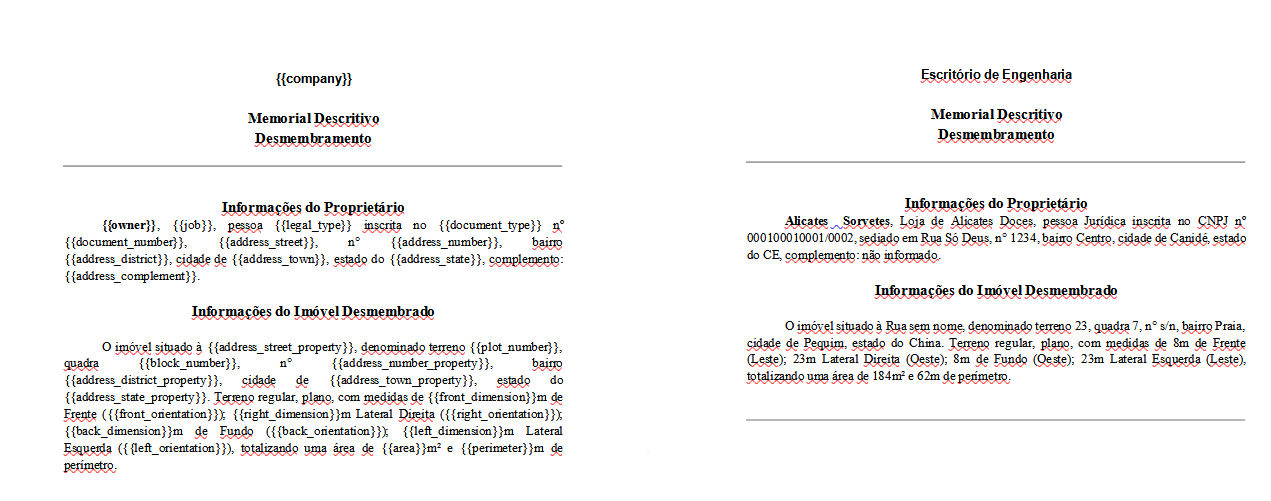

Planilha:
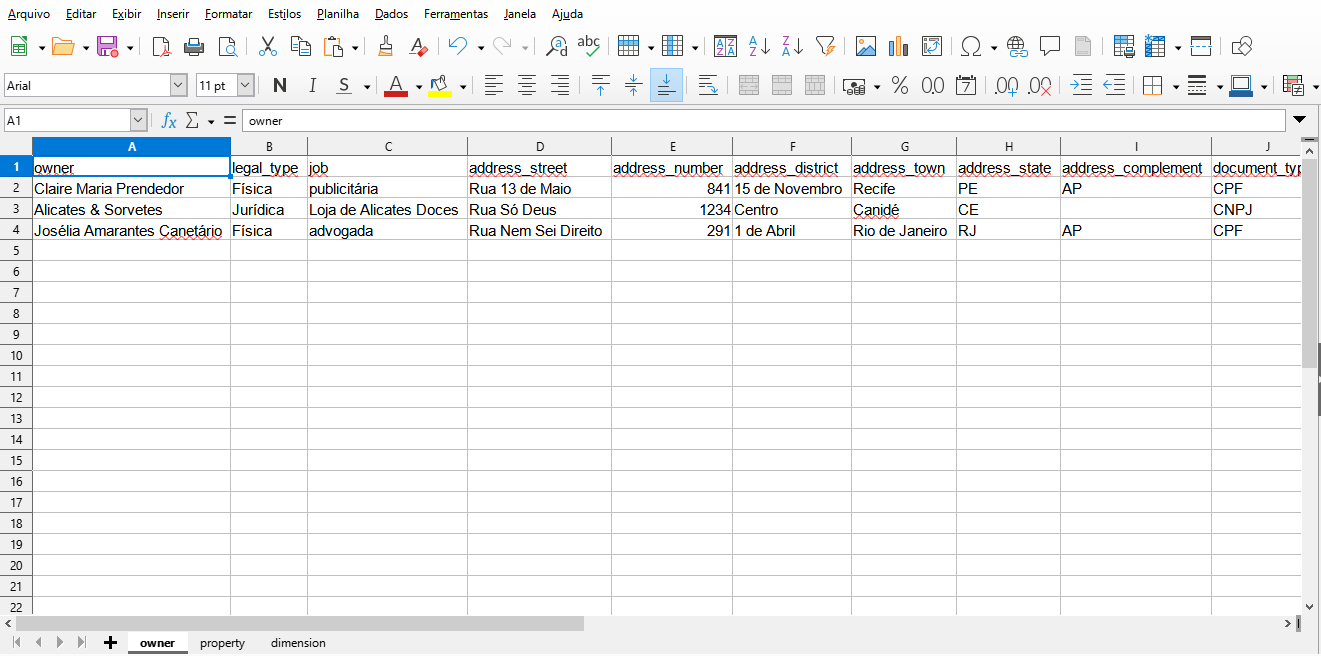

In [2]:
# Se os pacotes não estiverem instalados
# Execurar somente uma vez
!pip install python.docx
!pip install docxtpl
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 3.6 MB/s 
  Created wheel for python.docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=d21f9122bd06e0dc6200163e044328998315971ba3b05f3d57ba1c8778bd62b7
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python.docx
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docxcompose: filename=docxcompose-1.3.4-py3-none-any.whl size=20908 sha256=4b7cf3221c4c2833a6839ccaf5caf91a381d28f113403fad3fcfd79dd48d0a58
  Stored in directory: /root/.cache/pip/wheels/b5/80/a5/6bbfdbb41a0acc938e68f0e6a2bc6a5e8b533947afd0f2d180
Successfully built docxcompose
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.

In [4]:
from docxtpl import DocxTemplate
import pandas as pd
from datetime import date

# Se for utilizar dados pelo Colab
# from google.colab import drive
# drive.mount('/content/drive/')

#### Requisitar banco de dados

In [17]:
# Via arquivo local ou Google Drive
path_file = r"Dataset_Test.xlsx"
sheet_list = ['owner','property','dimension']
owner_name_list = ['Claire Maria Prendedor','Alicates & Sorvetes','Josélia Amarantes Canetário']
#

df = pd.DataFrame()
df['owner'] = owner_name_list

for sheet_name in sheet_list:
    df_excel = pd.read_excel(path_file,sheet_name=sheet_name)
    df = df.merge(df_excel,how='inner',on='owner')
    
df

,owner,legal_type,job,address_street,address_number,address_district,address_town,address_state,address_complement,document_type,...,front_dimension,back_dimension,left_dimension,right_dimension,front_orientation,back_orientation,left_orientation,right_orientation,area,perimeter
0,Claire Maria Prendedor,Física,publicitária,Rua 13 de Maio,841,15 de Novembro,Recife,PE,AP,CPF,...,12,12,34,34,Leste,Oeste,Leste,Oeste,408,92
1,Alicates & Sorvetes,Jurídica,Loja de Alicates Doces,Rua Só Deus,1234,Centro,Canidé,CE,NaN,CNPJ,...,8,8,23,23,Leste,Oeste,Leste,Oeste,184,62
2,Josélia Amarantes Canetário,Física,advogada,Rua Nem Sei Direito,291,1 de Abril,Rio de Janeiro,RJ,AP,CPF,...,15,15,19,19,Leste,Oeste,Leste,Oeste,285,68


In [21]:
# Via gsheet
# Link: https://docs.google.com/spreadsheets/d/@ID@/edit#gid=0
# gsheet_id = '@ID@'

# id da tablea
gsheet_id = '@ID@'
gsheet_list = ['owner','property','dimension']
owner_name_list = ['Claire Maria Prendedor','Alicates & Sorvetes','Josélia Amarantes Canetário']
#

df = pd.DataFrame()
df['owner'] = owner_name_list

for gsheet_name in gsheet_list:
    gsheet_url = f'https://docs.google.com/spreadsheets/d/{gsheet_id}/gviz/tq?tqx=out:csv&sheet={gsheet_name}'
    df_gsheet= pd.read_csv(gsheet_url)

    df = df.merge(df_gsheet,how='inner',on='owner')
df

,owner,legal_type,job,address_street,address_number,address_district,address_town,address_state,address_complement,document_type,...,front_dimension,back_dimension,left_dimension,right_dimension,front_orientation,back_orientation,left_orientation,right_orientation,area,perimeter
0,Claire Maria Prendedor,Física,publicitária,Rua 13 de Maio,841,15 de Novembro,Recife,PE,AP,CPF,...,12,12,34,34,Leste,Oeste,Leste,Oeste,408,92
1,Alicates & Sorvetes,Jurídica,Loja de Alicates Doces,Rua Só Deus,1234,Centro,Canidé,CE,NaN,CNPJ,...,8,8,23,23,Leste,Oeste,Leste,Oeste,184,62
2,Josélia Amarantes Canetário,Física,advogada,Rua Nem Sei Direito,291,1 de Abril,Rio de Janeiro,RJ,AP,CPF,...,15,15,19,19,Leste,Oeste,Leste,Oeste,285,68


#### Definição do Template

In [18]:
template_path = r"Descriptive_Memorial_Template_Portuguese.docx"
template = DocxTemplate(template_path)

#### Definição da Empresa e Relatório

In [19]:
date_str = date.today().strftime("%d de %B de %Y")

company_data = {
    'company':'Escritório de Engenharia',
    'address_company':'Rua das Flores, 1234, Pedras Soltas, Fortaleza-CE',
    'town':'Fortaleza/CE',
    'date':date_str,
    'technical_name':'Carlos Carvalho Cavalcante Cavalinho',
    'RNP':'000000000',
}

#### Criar arquivos

In [21]:
save_path = r'Memorial Descritivo/'

# Data
month_replace_list = {
    'January':'Janeiro',
    'February':'Fevereiro',
    'March':'Março',
    'April':'Abril',
    'May':'Maio',
    'June':'Junho',
    'July':'Julho',
    'August':'Agosto',
    'September':'Setembro',
    'October':'Outubro',
    'November':'Novembro',
    'December':'Dezembro'
}

for month in month_replace_list:
    date_str = date_str.replace(month, month_replace_list[month])

# Editar arquivo
for row in df.index:
    key_value = df.loc[row].fillna('não informado').to_dict()

    # Adapatações do texto
    if key_value['legal_type'] == 'Jurídica':
        key_value['address_street'] = 'sediado em ' + key_value['address_street']
    elif key_value['legal_type'] == 'Física':
        key_value['address_street'] = 'residente em ' + key_value['address_street']
    
    key_value.update(company_data)
    template.render(key_value)
    save_file = save_path + f"Memorial Descritivo - {key_value['owner']}.docx"
    template.save(save_file)
    print(f'Relatório "{save_file}" gerado com sucesso')

Relatório "Memorial Descritivo/Memorial Descritivo - Claire Maria Prendedor.docx" gerado com sucesso
Relatório "Memorial Descritivo/Memorial Descritivo - Alicates & Sorvetes.docx" gerado com sucesso
Relatório "Memorial Descritivo/Memorial Descritivo - Josélia Amarantes Canetário.docx" gerado com sucesso
